# Laboratorio 1 - Regresión

 Estudiante 1: María Alejandra Pinzón Roncancio - 202213956

 Estudiante 2: Ignacio Chaparro - 202220577

Estudiante 3: Mateo Lopez - 202220119

# **1. Descripción del entendimiento de datos**

### 1.1 Descripción de las variables de los datos

Primero, vamos a describir las variables que se tienen en el dataset, para poder entender la información que se tiene y poder utilizarla para el modelado.

- **`objid`**: Identificador único de cada medida, no tiene ninguna relevancia para el objetivo buscado así que no será de importancia como variable para la etapa de modelado
- **`ra`**: Ubicación del objeto en su componente de ascensión recta de coordenada celeste. los valores posibles están entre 10 y 250.
- **`dec`**: Ubicación del objeto en su componente de declinación de coordenada celeste.
- **`u`**: Magnitud del objeto capturada en el filtro ultravioleta. Tiene que ser un valor positivo.
- **`g`**: Magnitud del objeto capturada en el filtro verde. Valor mayor a 0.
- **`r`**: Magnitud del objeto capturada en el filtro rojo. Valor mayor a 0.
- **`z`**: Magnitud del objeto capturada en el filtro casi-infrarrojo. Valor mayor a 0.
- **`i`**: Magnitud del objeto capturada en el filtro infrarrojo. Valor mayor a 0.
- **`run`**: Número de observación realizada por el telescopio.
- **`camcol`**: Columna de la cámara en la que se registró el objeto.
- **`field`**: Sección de la columna de la cámara en la que se registró el objeto.
- **`score`**: Valor de calidad de la observación en la sección de la columna (field). Es un número entre 0 y 1.
- **`clean`**: Flag que indica si la fotometría del objeto es confiable. (1) si lo es (0) en caso de que se sospeche irregularidades con la fotometría.
- **`class`**: Tipo de objeto registrado: Estrella (STAR) o Galaxia (GALAXY) o Cuasar (QSO)
- **`redshift`**: Valor de corrimiento al rojo obtenido del objeto calculado por espectroscopía. *Es la variable objetivo.*
- **`mjd`**: Día juliano en que se registró el objeto.
- **`rowv`**: Velocidad horizontal (fila) del objeto en grados/día.
- **`colv`**: Velocidad vertical (columna) del objeto en grados/columna.

### **Clasificación:**

- **Numéricas:** `ra`, `dec`, `u`, `g`, `r`, `z`, `i`, `score`, `mjd`, `rowv`, `colv`
- **Categóricas:** `objid`, `run`, `camcol`, `field`, `class`
- **Booleanas:** `clean`
- **Variable objetivo:** `redshift`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import joblib

### 1.2 Carga de datos

In [2]:
data_path = "Regresion_train_data.csv"
dataframe_train = pd.read_csv(data_path)

In [3]:
dataframe_train.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,0.086479,54468.000000,0.001698,0.001672
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.00000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


## 1.3 Analisis del dataframe

El perfilamiento de datos es el proceso mediante el cual se examinan las características y calidad de un conjunto de datos para comprender su estructura, identificar posibles problemas y definir las transformaciones necesarias antes de construir un modelo predictivo. En esta etapa, se realiza un primer análisis del `dataframe_train` para obtener una visión inicial de las variables y su comportamiento, así como para decidir qué pasos seguir en la preparación de los datos.

- Número total de registros: 4000 en todas las columnas, lo que indica que no hay valores nulos.
- Distribución de las variables: Se observan diferentes escalas y magnitudes entre las variables, lo que sugiere la necesidad de una estandarización para el modelado.



### **Análisis de variables numéricas**

 **Coordenadas celestes (ra, dec)**
- **`ra` (ascensión recta)**: Rango entre 10.47 y 249.76, con una media de 185.52 y una desviación estándar de 41.69.  
  - **Posible transformación**: Conversión a coordenadas cartesianas (x, y, z) para reflejar de mejor manera su relación espacial.  
- **`dec` (declinación)**: Rango entre -1.25 y 13.85, con una media de 0.24 y una desviación estándar de 2.00.  
  - **Observación**: Presencia de valores negativos, lo cual es normal para esta variable.

---

 **Magnitudes fotométricas (u, g, r, i, z)**
- **Rangos**: Se encuentran en el espectro positivo.  
- **Valores extremos**: `i` y `z` tienen valores máximos superiores al resto, lo que podría afectar el modelo si no se estandarizan.

---

 **Tiempo de observación (mjd)**
- **Rango**: Desde 51608 hasta 58932, con una media de 52957.12 y una desviación estándar de 1601.15.  
  - **Riesgo**: **Sesgo temporal** debido a la naturaleza creciente de la fecha.  
  - **Transformación necesaria**: Convertir a días secuenciales y extraer características cíclicas del mes.

---

 **Velocidades (rowv, colv)**
- Valores cercanos a cero, pero con algunos extremos negativos y positivos.  

---

### **Análisis de variables categóricas**

- **`class`**: Tiene tres posibles valores (`STAR`, `GALAXY`, `QUASAR`), pero se observa inconsistencia en su representación (`S` y `STAR`).  
  - **Transformación requerida**: Aplicar `OneHotEncoding` y eliminar una categoría para evitar multicolinealidad.

- **`clean`**: Variable booleana que marca registros con posibles problemas en la fotometría.  

---

###  **Análisis de calidad de los datos**
En pasos posteriores se analizaran los siguientes:
- **Duplicados**
- **Valores nulos** 
- **Outliers**

---

###  **Conclusion del perfilamiento inicial**

 **Transformaciones necesarias**:  
   - `mjd`: Conversión a días secuenciales y extracción de características cíclicas.  
   - `ra` y `dec`: Conversión a coordenadas cartesianas.  
   - `class`: Aplicar `OneHotEncoding` con eliminación de una categoría.  
   - Estandarización de variables numéricas.



## **2. Descripción del proceso de selección de variables**

### Elección de variables importantes para el modelo

 ### 2.1 Primer selección de variables
 
 - La variable objetivo es `redshift`, por lo que se debe seleccionar las variables que tengan una correlación con esta variable.
 - Para esto, vamos a seleccionar las variables numéricas de los datos. Desde el primer instante no se va a considerar en la selección de variables las variables como `run`, `field`, `camcol`, que, aunque son variables numéricas, son simplemente identificadores y no tienen una correlación con la variable objetivo. También del dataset se omite la variable `objectid` ya que no es una variable relevante para el modelado. 
- Incluiremos las variables cualitativas, la variable `class` sera considerada para el analisis posterior, ya que no es una variable numérica.
- Se tiene en cuenta que la variable `clean` es una variable booleana, esta puede usarse para este paso, ya que una variable booleana puede representar la presencia o ausencia de una característica importante en los datos. 

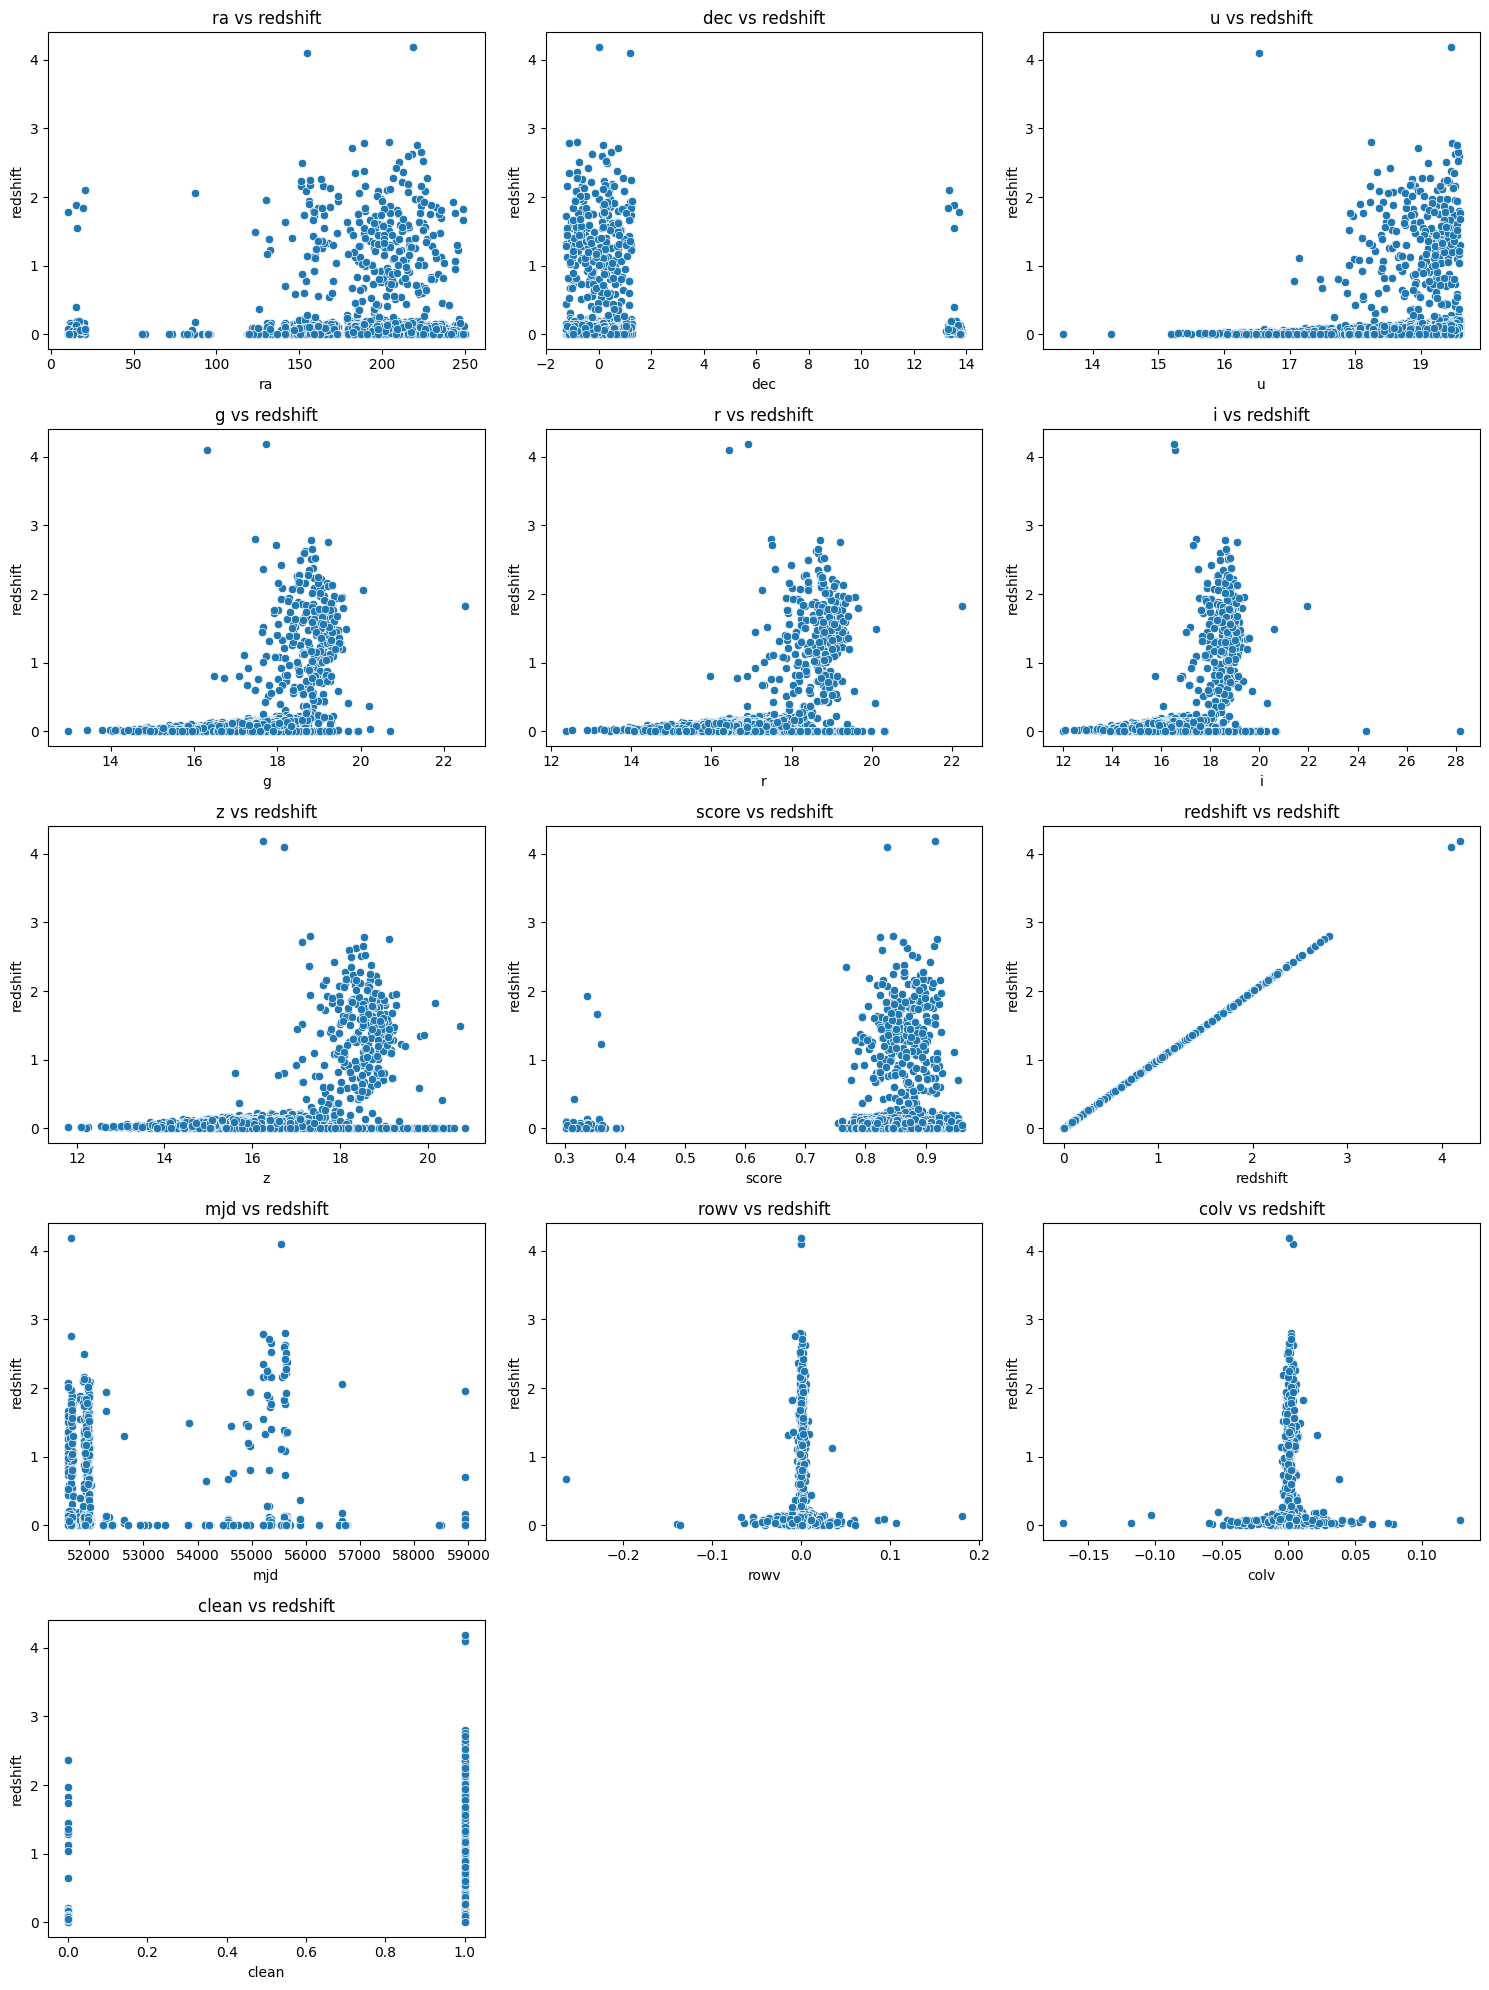

In [4]:
# Score es un variable booleana que va de 0 a 1
# Clean es booleana que explica irregularidades en la foto

variables_cuantitativas = ["ra", "dec", "u", "g", "r", "i", "z","score", "redshift", "mjd", "rowv", "colv", "clean"]
# Crear una figura con subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20)) # Aumentado a 5x3 para tener 15 subplots
axes = axes.ravel()

# Crear scatter plots para cada variable
for idx, variable in enumerate(variables_cuantitativas):
    sns.scatterplot(
        data=dataframe_train,
        x=variable,
        y='redshift',
        ax=axes[idx]
    )
    axes[idx].set_title(f'{variable} vs redshift')

# Eliminar los subplots vacíos
for idx in range(len(variables_cuantitativas), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

 De las graficas se puede concluir lo siguiente:
 - Las variables a incluir en el siguiente analisis son:
     - `u`, `g`, `r`, `i`, `z` . Se observa cierta proporcionalidad entre redshift y estas variables.
     - `mjd` ( que puede requerir una transformación, posteriormente se explicará el porque)
     - `ra`, `dec` (que pueden requerir una transformación, posteriormente se explicará el porque)
 
 - La variables a descartar son:
     - `score`, `rowv`, `colv`, `clean`. No se observa proporcionalidad entre redshift y estas variables, además no hay razones para considerar que estas variables sean relevantes para el modelo.
 
 ### 2.2 Segunda selección de variables - Análisis de correlación


 Entonces, como se puede evidenciar una tendencia cuando se analizan las graficas de las variables `i`, `r`, `z`, `g` y `u`. Podria empezar a sospecharse comportamientos proporcionales entre redshift y estas variables. Ahora con las variables que se van a utilizar, se puede realizar un mapa de calor para ver la correlación entre las variables. Esto, con el fin de identificar y descartar variables que no aportan información relevante para el modelo dado que pueden ser colineales.


<Axes: title={'center': 'Correlación entre variables'}>

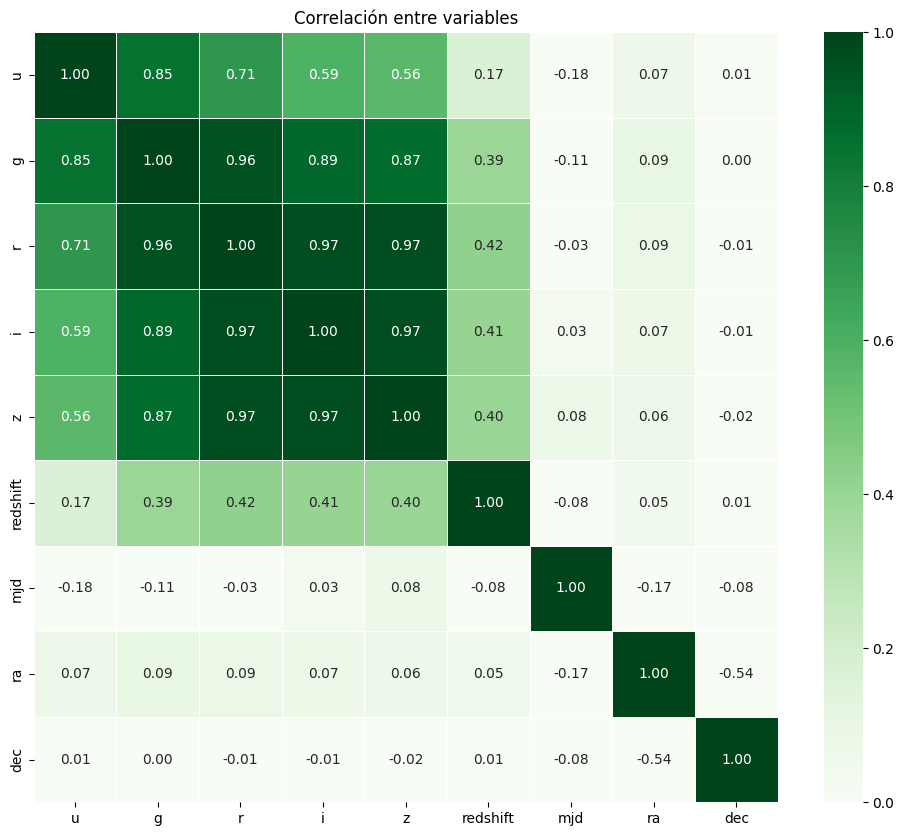

In [5]:
variables_cuantitativas_2 = ['u', 'g', 'r', 'i', 'z', 'redshift', 'mjd', 'ra', 'dec']

plt.figure(figsize=(12, 10))
plt.title('Correlación entre variables')
sns.heatmap(
    dataframe_train[variables_cuantitativas_2].corr(), 
    cmap="Greens", 
    vmin=0, 
    vmax=1, 
    annot=True, 
    fmt=".2f",  
    linewidths=0.5,  
    cbar=True
)

 Al observar este mapa de calor, podemos ver que las variables `u`, `g`, `r`, `i` y `z` son las que mayor correlación tienen con nuestra variable objetivo `redshift`.
 
 Sin embargo, se puede observar que las variables `u`, `g`, `r`, `i` y `z` son altamente colineales entre si, por lo que se va a seleccionar solo dos de ellas para el modelo.
 
 - Debido a los valores cercanos que tienen las variables `g`, `r`, `i` y `z`, se va a seleccionar `r`, que tiene una correlación más alta con `redshift` que las otras variables.
 - Ahora vamos a analizar la colinealidad entre `r` y el resto de las variables.
   - `u` y `r` tienen una correlación de 0.70
   - `g` y `r` tienen una correlación de 0.96
   - `i` y `r` tienen una correlación de 0.97
   - `z` y `r` tienen una correlación de 0.97
   
   - Se elegirá `g` debido a que su correlación con `r` es la segunda más baja y sigue teniendo una correlación más alta con redshift.

   Una vez seleccionadas las variables `g` y `r`, vamos a analizar que ocurrio con las otras variables `mjd`, `ra`, `dec`, `class`, antes de pasar a la estandarización de las variables.


 #### 2.3 Transformación de la variable mjd
 La variable `mjd` representa el día juliano **modificado** en que se registró la observación del objeto astronómico. Su naturaleza y posible impacto en la regresión requieren una evaluación detallada. 
 En la fase del entendimiento de los datos, se identifico que es una variable grande en comparacion con otras variables en el dataset. Entonces se investigo a que hace referencia esta variable y se encontro un posible sesgo temporal. El sesgo temporal en `mjd` ocurre porque sus valores aumentan continuamente con el tiempo, lo que puede hacer que el modelo aprenda tendencias artificiales en lugar de relaciones reales con `redshift`. Además, su escala grande puede afectar la estabilidad numérica y dificultar la interpretación. Para corregirlo, se convierte en días secuenciales desde un mínimo y se extraen meses en formato cíclico (sin y cos) para capturar patrones estacionales sin inducir dependencia temporal. 

 Para manejar este sesgo temporal, se realizaron las siguientes transformaciones:
 1. Se convirtió mjd a días secuenciales comenzando desde 0, restando el valor mínimo de mjd del conjunto de datos
 2. Se convirtió mjd a fechas reales usando como época el 17 de noviembre de 1858
 3. Se extrajeron los meses de las fechas y se transformaron en características cíclicas usando funciones seno y coseno
 Esto permite capturar patrones estacionales mientras se mantiene la naturaleza cíclica de los meses


In [6]:
# Convertir mjd a días secuenciales y características cíclicas de mes
mjd_values = dataframe_train['mjd'].values

# Convertir a días secuenciales empezando desde 0
min_mjd = mjd_values.min()
sequential_days = mjd_values - min_mjd

# Convertir mjd a datetime para obtener información del mes
# La época mjd comienza el 17 de noviembre de 1858
mjd_epoch = pd.Timestamp('1858-11-17')
dates = pd.to_datetime(mjd_values, unit='D', origin=mjd_epoch)

# Extraer mes y convertir a características cíclicas
months = dates.month
month_sin = np.sin(2 * np.pi * months / 12)
month_cos = np.cos(2 * np.pi * months / 12)

# Agregar nuevas características al dataframe
dataframe_train['mjd_sequential'] = sequential_days
dataframe_train['month_sin'] = month_sin
dataframe_train['month_cos'] = month_cos

# Mostrar las primeras filas de los datos transformados
print("Primeras 5 filas de los datos mjd transformados:")
print(dataframe_train[['mjd', 'mjd_sequential', 'month_sin', 'month_cos']].head())

Primeras 5 filas de los datos mjd transformados:
     mjd  mjd_sequential  month_sin  month_cos
0  54140            2532   0.866025   0.500000
1  51955             347   0.866025   0.500000
2  51913             305   0.500000   0.866025
3  51959             351   0.866025   0.500000
4  54562            2954   0.866025  -0.500000


#### 2.4 Transformación de las variables ra y dec

Ahora, la transformación de ra (ascensión recta) y `dec (declinación) puede ser útil porque estos valores representan coordenadas angulares en la esfera celeste, y tratarlas como variables numéricas directas puede introducir sesgos o distorsiones en analisis de que variables son relevantes para el modelo.

 Para manejar esto, convertiremos las coordenadas esféricas (ra, dec) a coordenadas cartesianas (x, y, z). Esto se hace mediante:
 1. Convertir ra y dec de grados a radianes 
 2. Calcular las coordenadas cartesianas usando las fórmulas:
    - x = cos(dec) * cos(ra)
    - y = cos(dec) * sin(ra) 
    - z = sin(dec)

 Esta transformación nos permite representar la posición de los objetos en un espacio tridimensional cartesiano, lo que puede ser más útil para el análisis y modelado.


In [7]:
# Convertir RA y Dec de grados a radianes
ra_rad = np.radians(dataframe_train['ra'])
dec_rad = np.radians(dataframe_train['dec'])

# Calcular coordenadas cartesianas
dataframe_train['x_cord'] = np.cos(dec_rad) * np.cos(ra_rad)
dataframe_train['y_cord'] = np.cos(dec_rad) * np.sin(ra_rad)
dataframe_train['z_cord'] = np.sin(dec_rad)

# Mostrar 5 filas del dataframe con las nuevas coordenadas cartesianas
print("\nPrimeras 5 filas con las coordenadas cartesianas:")
print(dataframe_train[['ra', 'dec', 'x_cord', 'y_cord', 'z_cord']].head())



Primeras 5 filas con las coordenadas cartesianas:
           ra       dec    x_cord    y_cord    z_cord
0  185.574486  0.701402 -0.995196 -0.097132  0.012241
1  203.801841 -0.853906 -0.914845 -0.403530 -0.014903
2  160.034264 -0.421626 -0.939872  0.341449 -0.007359
3  200.807373 -0.682024 -0.934714 -0.355202 -0.011903
4  189.792404 -1.001480 -0.985280 -0.170053 -0.017478


### 2.5 Modificación de la columna 'class'

Revisando los datos en la columna 'class', se puede ver que se utilizan notaciones distintas para las categorías de los objetos. por ejemplo, 'S' y 'STAR' son la misma categoría, 'G' y 'GALAXY' son la misma categoría, 'QSO' y 'QUASAR' son la misma categoría. Esto ocurre repetidas veces en el dataset, por lo que no es un caso en el que se deba eliminar datos, sino que se debe mantener la consistencia de los datos estableciendo una notación común para todas las categorías.


In [8]:
uniques = dataframe_train['class'].unique()
uniques

array(['STAR', 'GALAXY', 'QSO', 'S', 'QUASAR', 'G'], dtype=object)

Se puede ver la existencia de valores no estandarizados en la columna 'class', por lo que se procede a reemplazar S por Star, QSO por Quasar y G por Galaxy para mantener esta consistencia de datos

In [9]:
# Estandarizar las categorías de class
dataframe_train['class'] = dataframe_train['class'].replace({
    'S': 'STAR', 
    'STAR': 'STAR',
    'G': 'GALAXY',
    'GALAXY': 'GALAXY', 
    'QSO': 'QUASAR',
    'QUASAR': 'QUASAR'
})

# Verificar las categorías únicas después de la estandarización
uniques = dataframe_train['class'].unique()
uniques

array(['STAR', 'GALAXY', 'QUASAR'], dtype=object)


### 2.6 Transformación de la variable class

Ya que no se pueden procesar las variables cualitativas directamente, como la variable `class`, se procede a codificarlas usando one-hot encoding. Al representar `class` con valores binarios, el modelo puede aprender cómo cada tipo de objeto astronómico afecta la variable objetivo.
Para este paso seutiliza One-Hot Encoding para y asi transformar la variable categórica `class` en un formato numérico.

In [10]:
# Aplicar One-Hot Encoding a la columna 'class'
encoder = OneHotEncoder(sparse_output=False, drop=None)
class_encoded = encoder.fit_transform(dataframe_train[['class']])
class_encoded_df = pd.DataFrame(class_encoded, columns=encoder.get_feature_names_out(['class']))

# Concatenar el dataframe original con las nuevas columnas codificadas
dataframe_train_encoded = pd.concat([dataframe_train, class_encoded_df], axis=1)

# Obtener los nombres de las columnas codificadas
class_columns = encoder.get_feature_names_out(['class'])

# Mostrar solo 5 filas para mejor visualización
# Se accede usando ['class'] + list(class_columns) para mostrar:
# 1. La columna original 'class' antes de la codificación
# 2. Las nuevas columnas generadas por el one-hot encoding (class_GALAXY, class_QUASAR, etc)
print("\nPrimeras 5 filas después de la codificación One-Hot:")
print(dataframe_train_encoded[['class'] + list(class_columns)].head())



Primeras 5 filas después de la codificación One-Hot:
    class  class_GALAXY  class_QUASAR  class_STAR
0    STAR           0.0           0.0         1.0
1  GALAXY           1.0           0.0         0.0
2  GALAXY           1.0           0.0         0.0
3  GALAXY           1.0           0.0         0.0
4    STAR           0.0           0.0         1.0


Ahora, tenemos tres nuevas variables que representan el tipo de objeto registrado, y analizando las nuevas columnas se puede notar que estas tres columnas no son independientes entre sí, ya que la clase original tenía solo tres posibles valores mutuamente excluyentes. Es decir, si sabemos el valor de dos de estas columnas, el tercero se puede inferir automáticamente. Eliminar una columna evita redundancia y problemas de colinealidad en la regresión. En este caso, dejando `class_GALAXY` y `class_STAR`, el modelo aún puede determinar si un objeto es un quasar cuando ambas toman el valor 0.


Entonces, luego de un analisis de correlación y de la transformación de las variables, finalmentese puede concluir que las variables que se van a utilizar son:
- `r`
- `g`
- `class_GALAXY`
- `class_STAR`
- `mjd_sequential`
- `month_sin`
- `month_cos`
- `x_cord`
- `y_cord`
- `z_cord`

El siguiente paso es estandarizar las variables  `r`, `g` , `mjd_sequential`, `month_sin`, `month_cos`, `x_cord`, `y_cord`, `z_cord`, para que el modelo pueda entrenar de manera correcta.

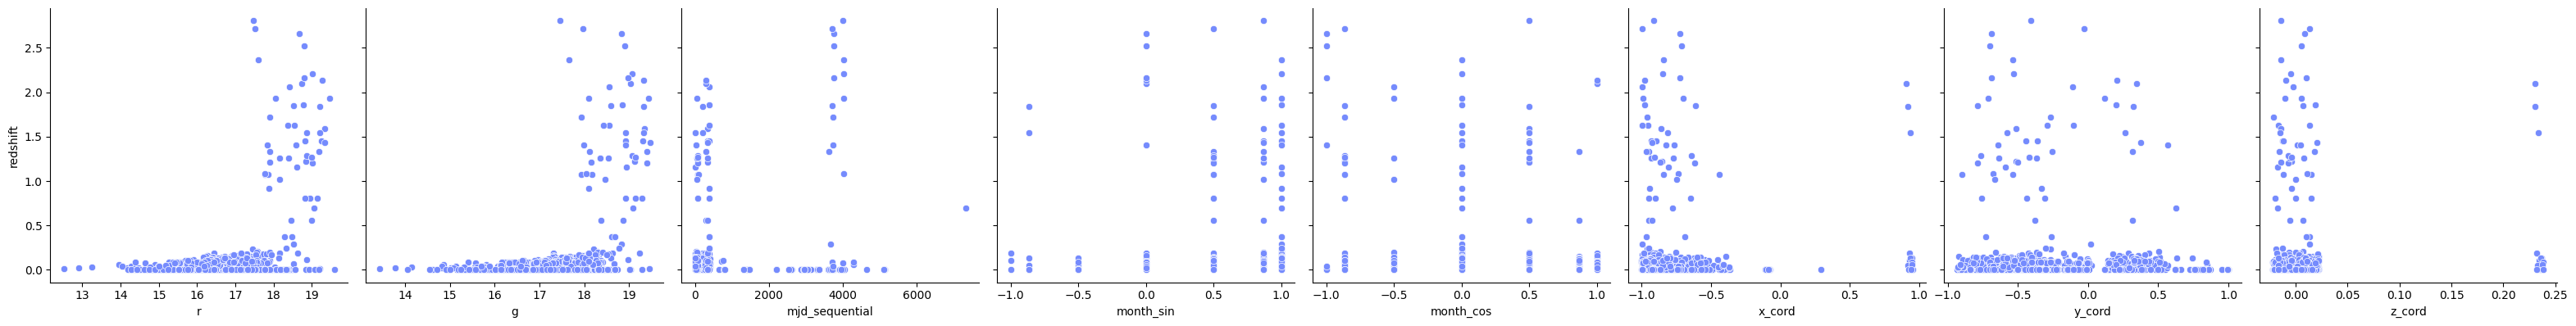

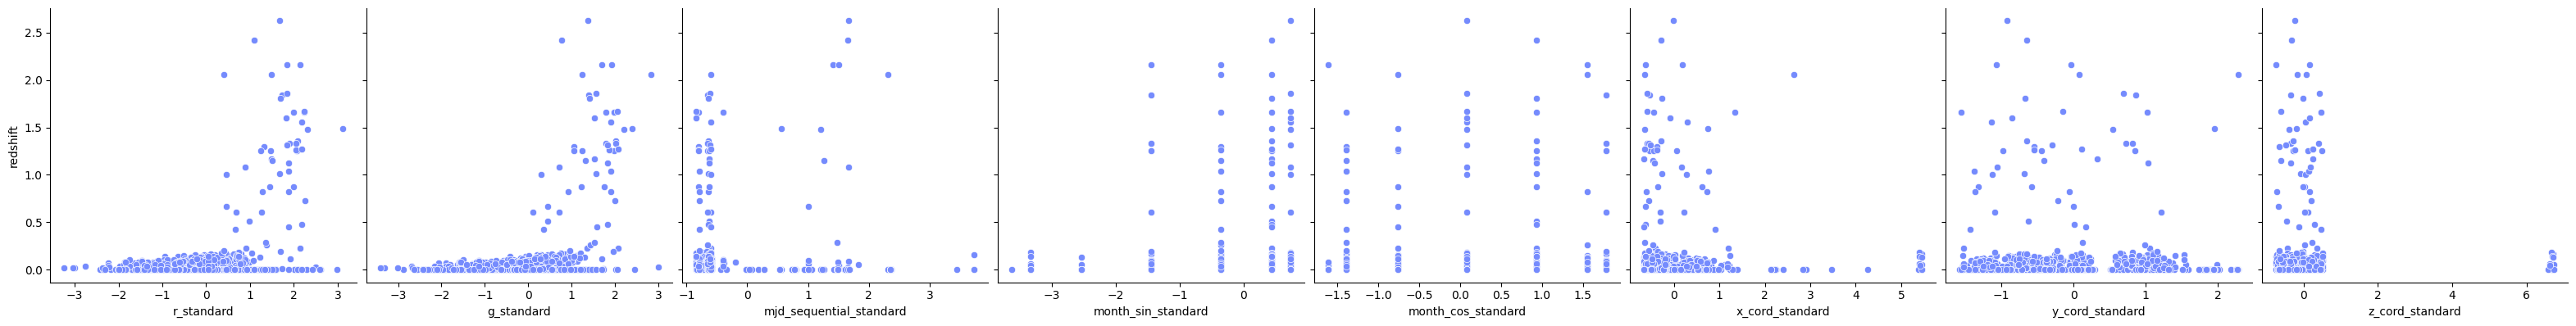

In [11]:
scaler = StandardScaler()

# Aplicar estandarización a las variables seleccionadas y actualizar el DataFrame
variables_a_estandarizar = ['r', 'g', 'mjd_sequential', 'month_sin', 'month_cos', 'x_cord', 'y_cord', 'z_cord']
variables_estandarizadas = [var + '_standard' for var in variables_a_estandarizar]

dataframe_train_encoded[variables_estandarizadas] = scaler.fit_transform(dataframe_train_encoded[variables_a_estandarizar])

# Visualizar la distribución antes y después de la estandarización
sns.pairplot(
    dataframe_train_encoded.sample(frac=0.2),
    height=4,
    y_vars="redshift",
    x_vars=variables_a_estandarizar,  # Variables originales
    kind="scatter",
    plot_kws={'color': '#758BFD'}
)

sns.pairplot(
    dataframe_train_encoded.sample(frac=0.2),
    height=4,
    y_vars="redshift",
    x_vars=variables_estandarizadas,  # Variables estandarizadas
    kind="scatter", 
    plot_kws={'color': '#758BFD'}
)




In [12]:
pd.set_option('display.max_columns', None)
dataframe_train_encoded.head()


,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv,mjd_sequential,month_sin,month_cos,x_cord,y_cord,z_cord,class_GALAXY,class_QUASAR,class_STAR,r_standard,g_standard,mjd_sequential_standard,month_sin_standard,month_cos_standard,x_cord_standard,y_cord_standard,z_cord_standard
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363,2532,0.866025,0.500000,-0.995196,-0.097132,0.012241,0.0,0.0,1.0,0.184592,0.270910,0.738859,0.441945,0.934106,-0.646513,0.096622,0.229229
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056,347,0.866025,0.500000,-0.914845,-0.403530,-0.014903,1.0,0.0,0.0,0.165648,0.279755,-0.625957,0.441945,0.934106,-0.394727,-0.512090,-0.554513
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028,305,0.500000,0.866025,-0.939872,0.341449,-0.007359,1.0,0.0,0.0,-0.013595,0.329742,-0.652192,-0.355059,1.555544,-0.473149,0.967941,-0.336688
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160,351,0.866025,0.500000,-0.934714,-0.355202,-0.011903,1.0,0.0,0.0,0.517332,0.435669,-0.623459,0.441945,0.934106,-0.456987,-0.416078,-0.467904
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465,2954,0.866025,-0.500000,-0.985280,-0.170053,-0.017478,0.0,0.0,1.0,2.485686,1.777527,1.002453,0.441945,-0.763692,-0.615439,-0.048247,-0.628870


# **3. Descripción e implementación del proceso de preparación de datos**
### 3.1 Completitud de los Datos


In [13]:
dataframe_train_encoded.isnull().sum() / dataframe_train.shape[0]

objid                      0.0
ra                         0.0
dec                        0.0
u                          0.0
g                          0.0
r                          0.0
i                          0.0
z                          0.0
run                        0.0
camcol                     0.0
field                      0.0
score                      0.0
clean                      0.0
class                      0.0
redshift                   0.0
mjd                        0.0
rowv                       0.0
colv                       0.0
mjd_sequential             0.0
month_sin                  0.0
month_cos                  0.0
x_cord                     0.0
y_cord                     0.0
z_cord                     0.0
class_GALAXY               0.0
class_QUASAR               0.0
class_STAR                 0.0
r_standard                 0.0
g_standard                 0.0
mjd_sequential_standard    0.0
month_sin_standard         0.0
month_cos_standard         0.0
x_cord_s

### 3.2 Eliminación de Datos Duplicados 
A continuación, se eliminan los datos duplicados del dataframe. Esto para evitar sesgo en el entrenamiento y evaluación incorrecta del modelo.


Luego de este paso Se puede ver que no hay datos nulos en el dataframe.

In [14]:
duplicados = dataframe_train_encoded.duplicated().sum()
duplicados

np.int64(17)

Se ha identificado la existencia de 17 datos duplicados en el dataframe, por lo que se procede a eliminarlos.


In [15]:
dataframe_train_encoded = dataframe_train_encoded.drop_duplicates().reset_index(drop=True)
duplicados = dataframe_train_encoded.duplicated().sum()
duplicados


np.int64(0)

## **4. Construcción del modelo de regresión lineal**

Después del análisis de correlación y colinealidad, se han seleccionado las siguientes variables para el modelo de regresión:

- `r_standard`
- `g_standard`
- `class_GALAXY`
- `class_STAR`
- `mjd_sequential_standard`
- `month_sin_standard`
- `month_cos_standard`
- `x_cord_standard`
- `y_cord_standard`
- `z_cord_standard`

Estas variables permitirán construir un modelo eficiente y evitar problemas de redundancia en la predicción.

Primero, debemos particionar el conjunto de datos entre datos de entrenamiento y datos de validación. Vamos a dividir los datos en conjunto de entrenamiento y prueba (X_train, X_test, y_train, y_test) con una proporción de 80% para entrenamiento y 20% para prueba.

In [16]:


y = dataframe_train_encoded['redshift']

# Seleccionar solo las variables que vamos a usar en el modelo
variables_modelo = ["r_standard","g_standard",'class_GALAXY','class_STAR','mjd_sequential_standard','month_sin_standard','month_cos_standard','x_cord_standard','y_cord_standard','z_cord_standard']
X = dataframe_train_encoded[variables_modelo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3186, 10), (797, 10), (3186,), (797,))

In [17]:
X_train.head()

,r_standard,g_standard,class_GALAXY,class_STAR,mjd_sequential_standard,month_sin_standard,month_cos_standard,x_cord_standard,y_cord_standard,z_cord_standard
557,-1.730057,-1.690039,1.0,0.0,-0.655315,-1.443786,1.783005,-0.554284,0.803539,0.436232
1586,0.682692,0.683648,1.0,0.0,-0.803352,-0.355059,-1.385129,1.309087,-1.554859,0.397293
602,0.861424,0.957751,1.0,0.0,-0.652192,-0.355059,1.555544,-0.473084,0.967893,-0.426569
442,2.477043,2.168673,0.0,0.0,-0.811472,0.441945,-0.763692,-0.638992,0.526728,-0.424831
1775,-0.162902,0.221396,1.0,0.0,-0.624708,0.441945,0.934106,-0.440730,1.021182,0.434989


Ya que tenemos la partición de los datos, procederemos con el entrenamiento del modelo de regresion lineal

In [18]:
regression = LinearRegression()
regression.fit(X_train, y_train)

coef_df = pd.DataFrame({"Columns": X.columns, "Coef": regression.coef_})
print(coef_df)
print("\nIntercept:", regression.intercept_)

                   Columns      Coef
0               r_standard  0.037269
1               g_standard -0.018243
2             class_GALAXY -1.159781
3               class_STAR -1.288187
4  mjd_sequential_standard  0.030181
5       month_sin_standard -0.003966
6       month_cos_standard  0.006546
7          x_cord_standard  0.007167
8          y_cord_standard -0.004721
9          z_cord_standard -0.008043

Intercept: 1.2658559707981187


El modelo genero los siguientes coeficientes, que representan el impacto de cada variable en la prediccion del redshift.

| Variable                     | Coeficiente | Impacto en el modelo |
|------------------------------|------------|-------------|
| `r_standard`                 | 0.037269   | Medio-Alto |
| `g_standard`                 | -0.018243  | Medio |
| `class_GALAXY`               | -1.159781  | Muy Alto |
| `class_STAR`                 | -1.288187  | Muy Alto |
| `mjd_sequential_standard`     | 0.030181   | Medio |
| `month_sin_standard`         | -0.003966  | Bajo |
| `month_cos_standard`         | 0.006546   | Medio-Bajo |
| `x_cord_standard`            | 0.007167   | Medio-Bajo |
| `y_cord_standard`            | -0.004721  | Bajo |
| `z_cord_standard`            | -0.008043  | Medio-Bajo  |

**Intercepto**: `1.2658559707981187`  

Las variables con mayor impacto en el modelo son `r_standard` , `class_GALAXY`, `class_STAR` y `mjd_sequential_standard`.

Ahora procederemos a validar nuestro modelo utilizando las siguientes metricas:

- *Error Absoluto Medio (MAE)*
- *Error Cuadrático Medio (RMSE)*
- *Coeficiente de Determinación (R²)*


In [19]:
y_pred_train = regression.predict(X_train)
y_pred_test = regression.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MAE (Entrenamiento): {mae_train:.4f}")
print(f"MAE (Prueba): {mae_test:.4f}")
print(f"RMSE (Entrenamiento): {rmse_train:.4f}")
print(f"RMSE (Prueba): {rmse_test:.4f}")
print(f"R^2 (Entrenamiento): {r2_train:.4f}")
print(f"R^2 (Prueba): {r2_test:.4f}")



MAE (Entrenamiento): 0.0684
MAE (Prueba): 0.0596
RMSE (Entrenamiento): 0.1906
RMSE (Prueba): 0.1580
R^2 (Entrenamiento): 0.7563
R^2 (Prueba): 0.8034


#### Análisis de Métricas del Modelo
Las métricas obtenidas para el modelo fueron:

| Métrica                 | Entrenamiento | Prueba  |
|-------------------------|--------------|---------|
| **MAE**                 | 0.0684       | 0.0596  |
| **RMSE**                | 0.1906       | 0.1580  |
| **R² Score**            | 0.7563       | 0.8034  |

### **Interpretación de los Resultados**
1. **El MAE en prueba (0.0596) es ligeramente menor que en entrenamiento (0.0684)**, lo que indica que el modelo tiene una buena capacidad de generalización y no está sobreajustado.
   
2. **El RMSE es bajo en ambos conjuntos (0.1906 en entrenamiento y 0.1580 en prueba)**, lo que significa que los errores de predicción no son grandes y el modelo está haciendo predicciones razonables.

3. **El \( R^2 \) en prueba (0.8034) es mayor que en entrenamiento (0.7563)**. Esto sugiere que el modelo generaliza bien y que podría haber algunas características en los datos de prueba que favorecen una mejor predicción. Además se acerca a 0, sin llegar a este valor, lo que descarta el sobreajuste.

La siguiente grafica compara los valores reales y predichos del redshift. Esto nos permite visualizar datos que fueron predichos efectivamente y outliers.


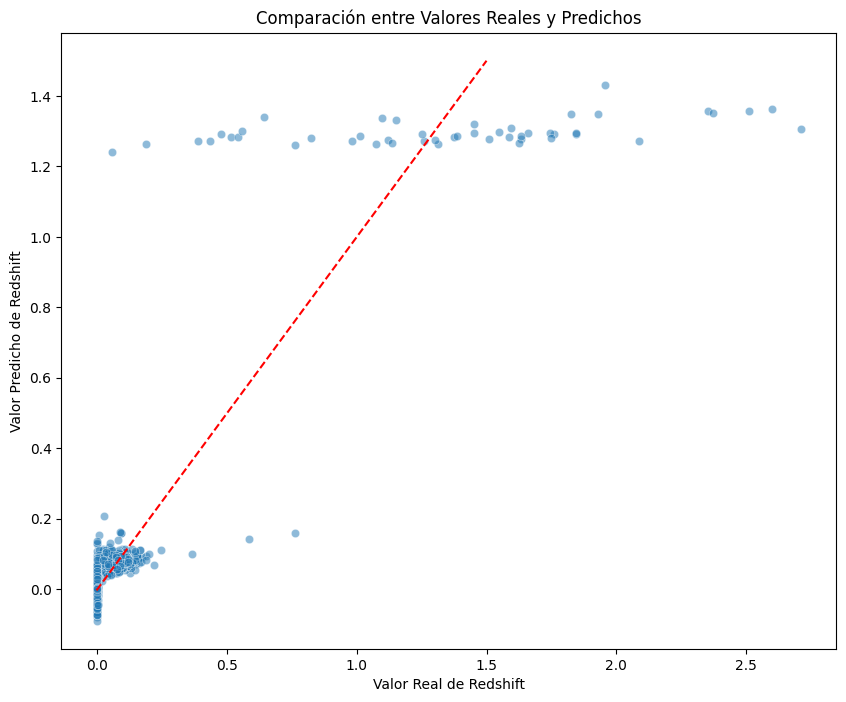

Valores reales de redshift (y_test):
408     0.039797
2547    0.000047
682     1.257948
3159    0.000747
2356    0.097484
Name: redshift, dtype: float64

Valores predichos de redshift (y_pred_test):
0    0.099258
1    0.058315
2    1.270922
3   -0.009809
4    0.083567
dtype: float64


In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.xlabel("Valor Real de Redshift")
plt.ylabel("Valor Predicho de Redshift")
plt.title("Comparación entre Valores Reales y Predichos")
plt.plot([y_train.min(), 1.5], [y_train.min(), 1.5], 'r--')  # línea de referencia
plt.show()

print("Valores reales de redshift (y_test):")
print(y_test.head())

print("\nValores predichos de redshift (y_pred_test):")
print(pd.Series(y_pred_test).head())

# **5.Implementación del pipeline** 

Ahora, vamos a encapsular y automatizar todos los procesos realizados anteriormente en una secuencia.

In [21]:
# Paso 1 Aquí cargamos el dataset desde un archivo CSV para trabajar con él
data_path = "Regresion_train_data.csv"
dataframe_pipeline = pd.read_csv(data_path)

 # Paso 2 Dividimos las variables en numéricas y categóricas, para aplicar transformaciones específicas a cada grupo.
num_features = ['r', 'g', 'mjd', 'ra', 'dec']
cat_features = ['class']

# Paso 3 Particion de datos en train y test.
X = dataframe_pipeline[num_features + cat_features]
y = dataframe_pipeline['redshift']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4 Transformación de la Variable mjd.

# Función para transformar mjd
def transform_mjd(X):
    mjd = X[:, 0]
    min_mjd = np.min(mjd)
    sequential_days = mjd - min_mjd
    mjd_epoch = pd.Timestamp('1858-11-17')
    dates = pd.to_datetime(mjd, unit='D', origin=mjd_epoch)
    months = dates.month
    month_sin = np.sin(2 * np.pi * months / 12)
    month_cos = np.cos(2 * np.pi * months / 12)
    return np.column_stack([sequential_days, month_sin, month_cos])

# Transformer de MJD
mjd_transformer = FunctionTransformer(transform_mjd, validate=False)

# Paso 5 Transformación de ra y dec.

# Función para transformar ra y dec a coordenadas cartesianas
def convert_ra_dec(X):
    ra_rad = np.radians(X[:, 0])
    dec_rad = np.radians(X[:, 1])
    x = np.cos(dec_rad) * np.cos(ra_rad)
    y = np.cos(dec_rad) * np.sin(ra_rad)
    z = np.sin(dec_rad)
    return np.column_stack([x, y, z])

# Transformer para RA y DEC
ra_dec_transformer = FunctionTransformer(convert_ra_dec, validate=False)

# Paso 6 Limpieza y Codificación de class.

# Función para limpiar la columna 'class'
def clean_class_column(X):
    X = pd.DataFrame(X, columns=["class"])
    mapping = {"G": "GALAXY", "S": "STAR", "QSO": "QUASAR"}
    X["class"] = X["class"].replace(mapping)
    return X.to_numpy()

# Transformer para la columna 'class'
class_cleaner = FunctionTransformer(clean_class_column, validate=False)

# Paso 7 Definir los Pipelines de Transformación.
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('mjd_transform', mjd_transformer),
    ('ra_dec_transform', ra_dec_transformer),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("clean_class", class_cleaner),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Paso 8 Combinar los Pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Paso 9 Construcción del Pipeline Completo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Paso 10 Entrenar el Pipeline
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('mjd_transform',
                                                                   FunctionTransformer(func=<function transform_mjd at 0x0000015BBCCAFEC0>)),
                                                                  ('ra_dec_transform',
                                                                   FunctionTransformer(func=<function convert_ra_dec at 0x0000015BB8FD8860>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['r', 'g', 'mjd', 'ra',
                                                   'dec']),
                                                 ('cat',
                                                  Pipeline(steps=[('clean_class',
                                                                   FunctionTransformer(func=<function clean_class_column at 0x0000015BBCCD1120>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['class'])])),
                ('regressor', LinearRegression())])

Modelo exportado en formato .joblib

In [22]:
#Paso 11 Exportar el modelo

joblib.dump(model_pipeline, 'regression_pipeline.joblib')

['regression_pipeline.joblib']

# **6. Exploración y conclusión sobre los supuestos de la regresión**

En este apartado se examina los supuestos básicos de la regresión en el contexto del modelo diseñado para predecir el redshift de objetos astronómicos a partir de las observaciones del telescopio StarAlpes. Aunque aún no se han evaluado algunos supuestos clásicos de la regresión lineal—como la homocedasticidad, la independencia de errores y la normalidad de los residuos—se ha llevado a cabo un análisis detallado sobre la colinealidad y la selección de variables, aspectos clave para garantizar la estabilidad y confiabilidad del modelo.

## 2. Evaluación de la Colinealidad

El primer análisis consistió en estudiar la correlación entre las variables predictoras y la variable objetivo. Se observó que las variables fotométricas u, g, r, i y z están altamente correlacionadas entre sí, lo que podría generar problemas de colinealidad en el modelo. Para abordar este inconveniente se adoptaron las siguientes estrategias:

- Se eligieron únicamente dos de las variables que mostraban alta correlación (g y r), priorizando aquellas que tienen una mayor relación con el redshift y presentan menor colinealidad entre ellas.
- Se constató que la variable r tiene correlaciones de 0.96, 0.97 y 0.97 con g, i y z respectivamente, lo que sugiere una redundancia en la información. Por ello, se decidió incluir g, ya que su correlación con r es la segunda más baja dentro del conjunto.
- Se eliminó una de las variables categóricas de la clase (class_*) para evitar la duplicación en la representación de los objetos astronómicos.

## 3. Selección de Variables

Luego del análisis de colinealidad, se seleccionaron las siguientes variables predictoras estandarizadas para el modelo:

- `r_standard`
- `g_standard`
- `class_GALAXY`
- `class_STAR`
- `mjd_sequential_standard`
- `month_sin_standard`
- `month_cos_standard`
- `x_cord_standard`
- `y_cord_standard`
- `z_cord_standard`

Esta selección permite reducir redundancias y facilita la interpretación del modelo, al eliminar relaciones lineales demasiado fuertes entre las variables predictoras.

## 4. Conclusiones

El análisis realizado hasta ahora sobre los supuestos de la regresión ha permitido identificar y corregir problemas de colinealidad, asegurando que las variables del modelo sean lo más independientes posible entre sí. La elección de variables se basó en criterios de correlación y relevancia predictiva, lo que favorecerá la estabilidad del modelo.

En próximas etapas se evaluará:

- **Colinealidad:** Comprobar si las variables seleccionadas tienen correlaciones entre ellas.
- **Linealidad:** Comprobar si la relación entre las variables predictoras y la variable objetivo es, en efecto, aproximadamente lineal.
- **Homocedasticidad:** Verificar que la varianza de los errores se mantenga constante a lo largo de todo el rango de predicciones.
- **Normalidad de los errores:** Analizar la distribución de los residuos para asegurarse de que sigue una distribución cercana a la normal.


# **7. Validación de Supuestos de la Regresión** 

En la construcción de un modelo de Machine Learning se deben realizar ciertos análisis luego de la obtención de un modelo. Entre estos análisis se debe analizar la colinealidad entre las variables seleccionadas, la linealidad de estar variables con la variable objetivo, la homocedasticidad y la normalidad de los errores.

## 7.1 Colinealidad

Es necesario que las variables seleccionadas tengan una colinealidad baja entre ellas

<Axes: >

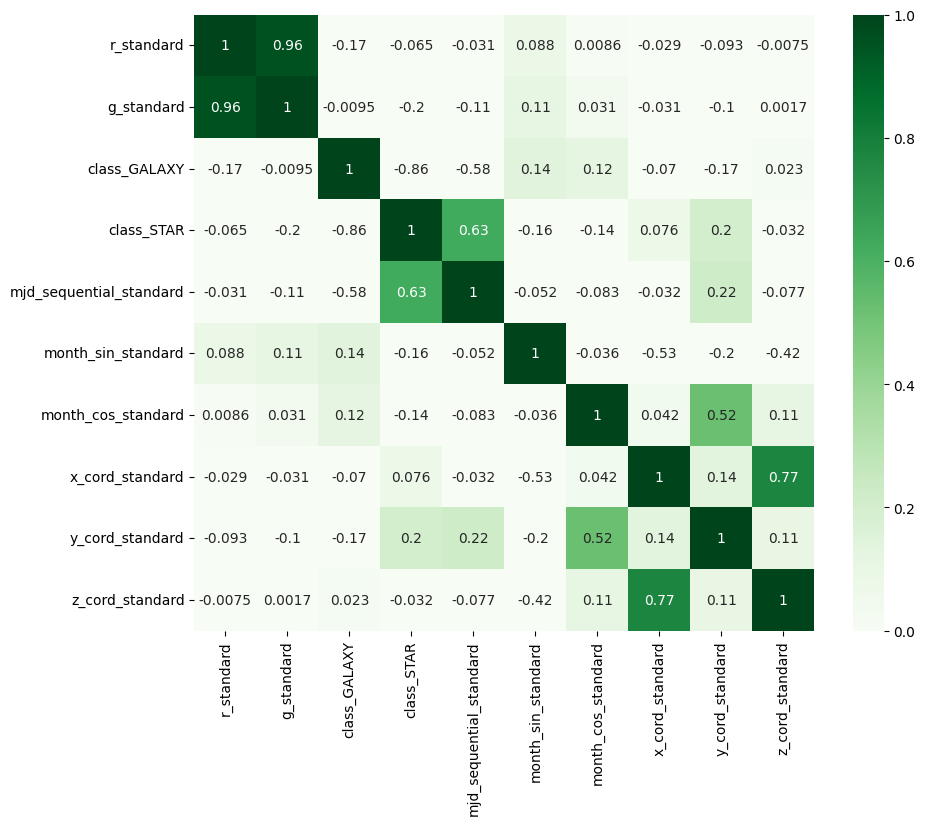

In [23]:
# Seleccionar solo las variables que vamos a usar en el modelo
variables_modelo = ["r_standard","g_standard",'class_GALAXY','class_STAR','mjd_sequential_standard','month_sin_standard','month_cos_standard','x_cord_standard','y_cord_standard','z_cord_standard']
X = dataframe_train_encoded[variables_modelo]

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="Greens", vmin=0, vmax=1)


En este caso podemos observar que todas las variables seleccionadas tienen una baja correlación entree ellas, menor a 90%, excepto las variables g_standard y r_standard. Sin embargo, estas 2 variables son clave para determinar el redshift de un objeto, ya que g y r son los datos de magintud del objeto. A pesar de tener una alta correlación entre ellas, son las 2 variables con menor correlación del grupo de variables que toman la magnitud del objeto en diferentes filtros. Por este motivo se deciden permitir mantener estas variables.

## 7.2 Linealidad

En este apartado se revisará la relación de las variables seleccionadas con la variable objetivo

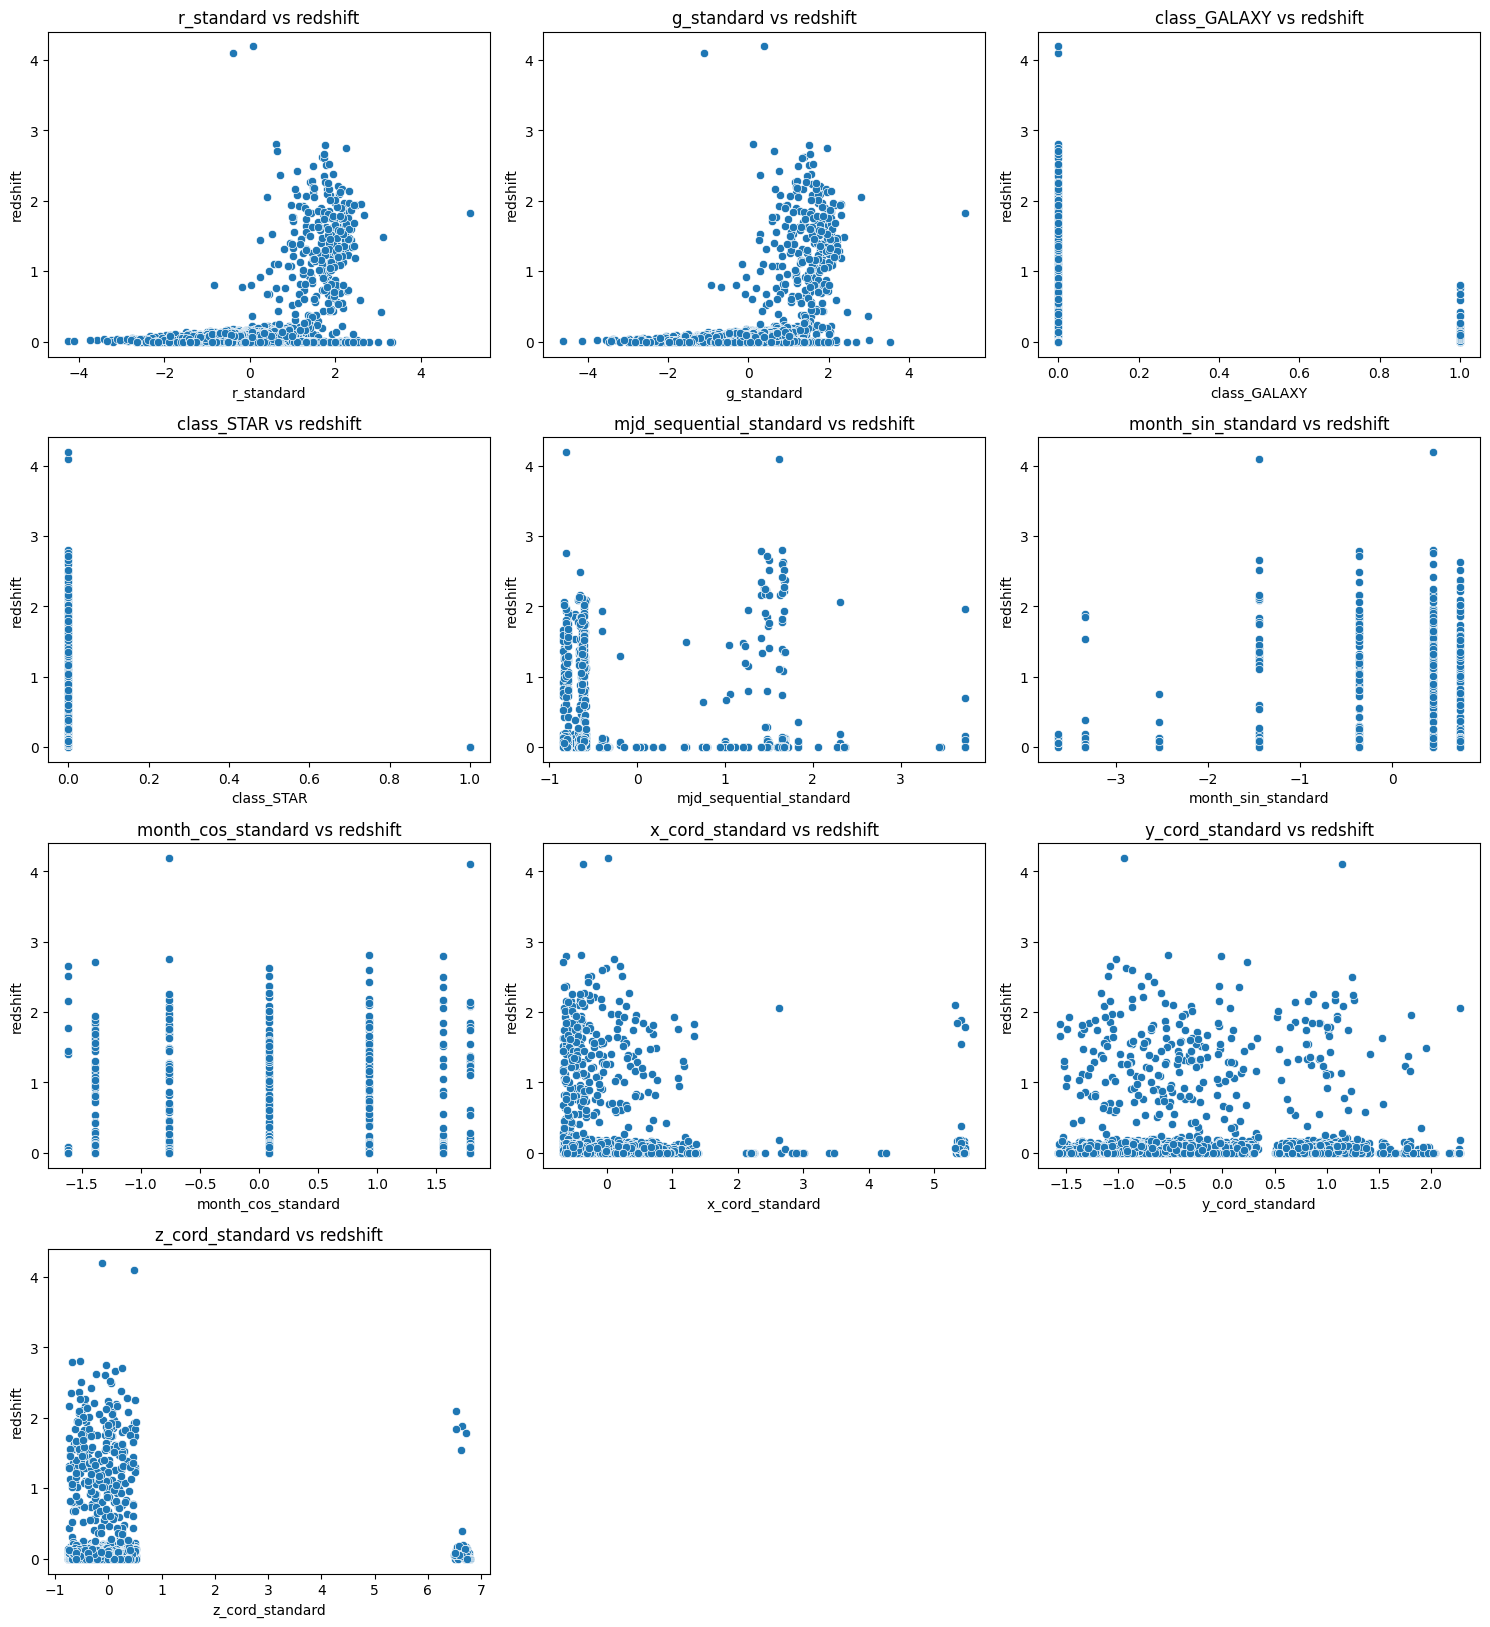

In [24]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20)) # Aumentado a 5x3 para tener 15 subplots
axes = axes.ravel()

# Crear scatter plots para cada variable
for idx, variable in enumerate(variables_modelo):
    sns.scatterplot(
        data=dataframe_train_encoded,
        x=variable,
        y='redshift',
        ax=axes[idx]
    )
    axes[idx].set_title(f'{variable} vs redshift')

# Eliminar los subplots vacíos
for idx in range(len(variables_modelo), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

A simple vista, las gráficas individuales no muestran una relación lineal fuerte entre cada variable independiente y el redshift: en la mayoría de ellas se observa una dispersión de puntos que no evidencia un patrón claramente creciente o decreciente. Esto sugiere que, de forma univariada, ninguna de estas variables explica por sí sola la variación de redshift de manera lineal. Adicionalmente, algunas variables son categóricas (por ejemplo, indicadores de tipo de objeto) y no es realista esperar una tendencia lineal directa, mientras que otras variables numéricas se distribuyen como “nubes” sin una correlación obvia con el redshift.

Sin embargo, el hecho de que el modelo de regresión lineal obtenga métricas altas (por ejemplo, 
$𝑅^2≈0.8$ y un RMSE bajo) indica que, combinadas, estas variables sí pueden aproximar muy bien la variación del redshift. Es decir, aunque no se vea linealidad en cada gráfico por separado, la suma (o combinación lineal) de las variables puede capturar patrones más sutiles que, en conjunto, explican gran parte de la varianza. Esto puede suceder, por ejemplo, cuando las variables categóricas separan fuertemente ciertos rangos de redshift (como ocurre con estrellas y galaxias), o cuando variables numéricas (magnitudes fotométricas, coordenadas, etc.) aportan pequeñas porciones de información que, al combinarse, generan un ajuste eficaz.

Además, la estandarización de las variables (por ejemplo, restar la media y dividir entre la desviación estándar) contribuye a que todas ellas estén en rangos comparables, lo cual facilita la estimación de los coeficientes en la regresión lineal y evita que variables con escalas muy grandes dominen el ajuste.

## 7.3 Normalidad de los errores

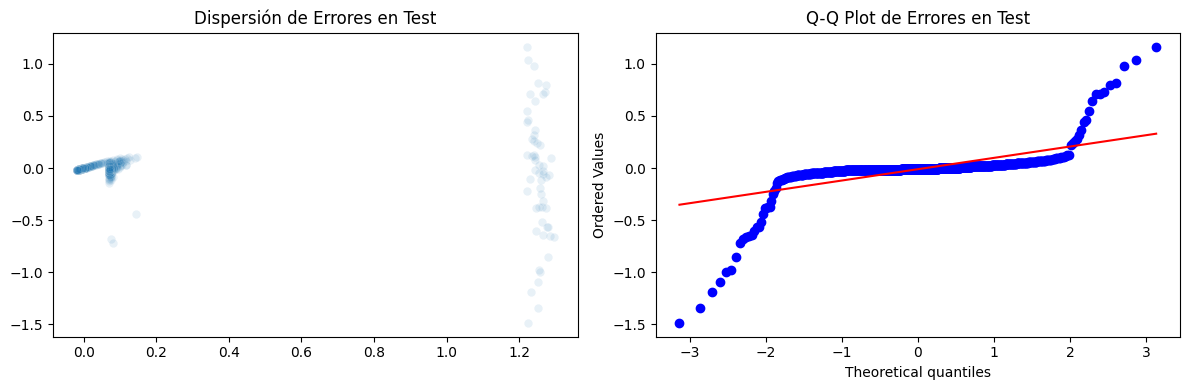

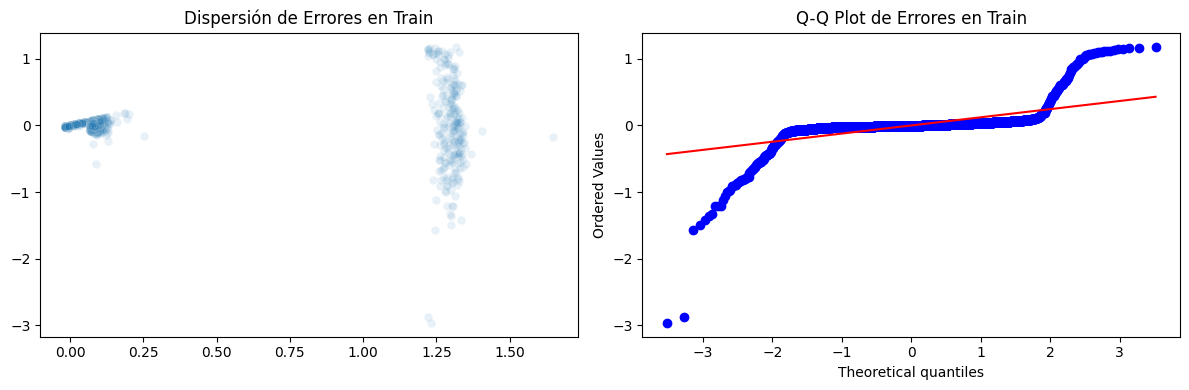

In [25]:
#Datos test
errors = (model_pipeline.predict(X_test) - y_test).values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
axes[0].set_title("Dispersión de Errores en Test")
sns.scatterplot(x=model_pipeline.predict(X_test), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores en Test")

plt.tight_layout()
plt.show()

#Datos train
errors = (model_pipeline.predict(X_train) - y_train).values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
axes[0].set_title("Dispersión de Errores en Train")
sns.scatterplot(x=model_pipeline.predict(X_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores en Train")

plt.tight_layout()
plt.show()



Al observar tanto las gráficas de dispersión de errores como los Q-Q plots en los datos de entrenamiento y prueba, se evidencia que las colas de la distribución de los residuos se desvían de lo que se esperaría en un comportamiento normal. Esto sugiere que, si se requiere una aproximación estrictamente normal de los errores (por ejemplo, para intervalos de confianza o pruebas de hipótesis), el modelo actual podría no satisfacer plenamente ese supuesto. Sería recomendable explorar transformaciones, como la logarítmica (u otras como Box-Cox), para comprobar si, al aplicarlas a la variable objetivo o a ciertas variables explicativas, se logra un mejor ajuste a la normalidad y, en consecuencia, una mayor validez estadística de los resultados.

### 7.3.1 Transformación logaritmica

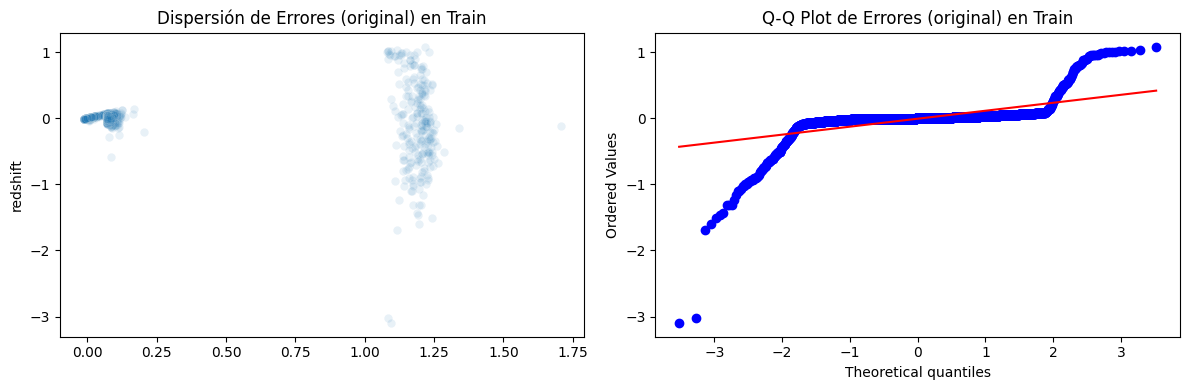

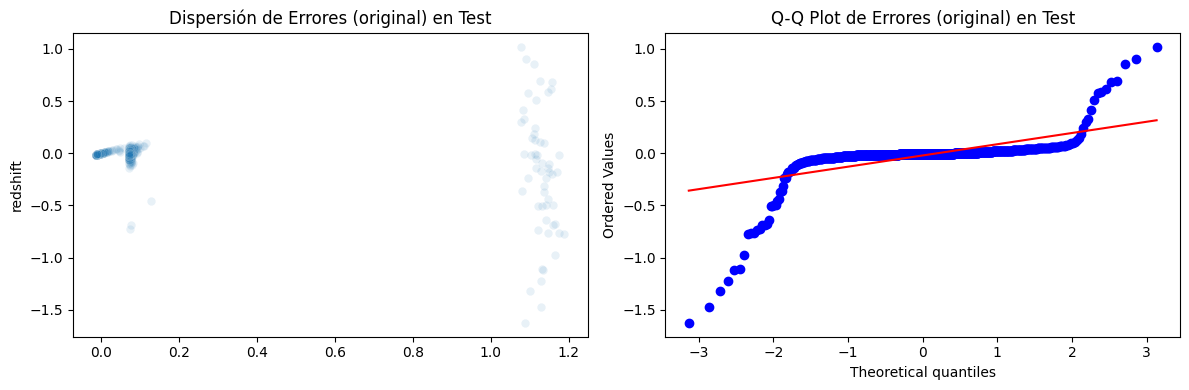

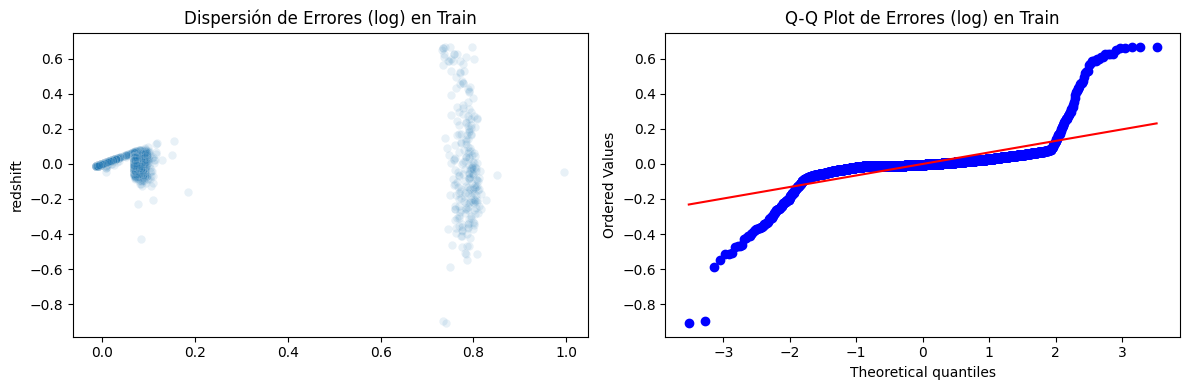

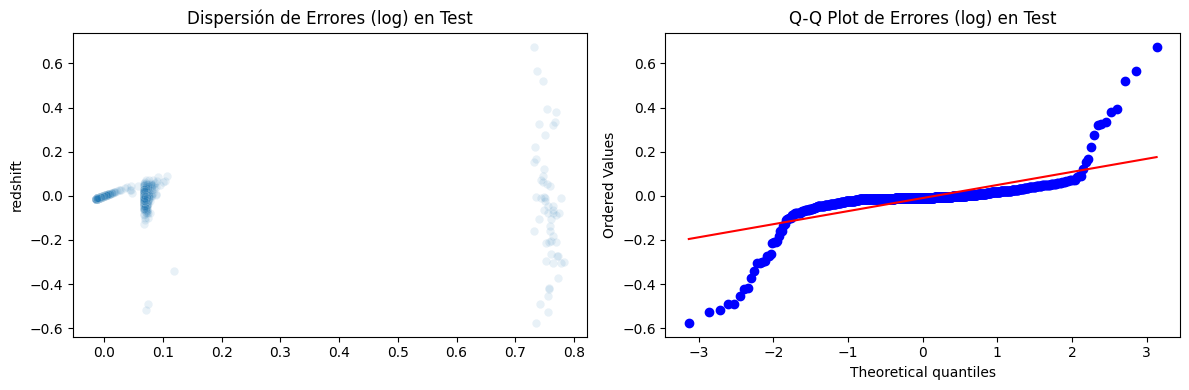

In [26]:
from sklearn.compose import TransformedTargetRegressor

regressor_with_log = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log1p,         # Transformación a log(1+y)
    inverse_func=np.expm1  # Inversa para volver a la escala original
)

# Pipeline final (preprocesamiento + modelo con target transformado)
model_pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor_with_log)
])
model_pipeline_log.fit(X_train, y_train)


# ERRORES EN ESCALA ORIGINAL: TRAIN

y_pred_train = model_pipeline_log.predict(X_train)
errors_train = y_pred_train - y_train

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersión de Errores (original) en Train")
sns.scatterplot(x=y_pred_train, y=errors_train, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_train, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (original) en Train")
plt.tight_layout()
plt.show()


# ERRORES EN ESCALA ORIGINAL: TEST
y_pred_test = model_pipeline_log.predict(X_test)
errors_test = y_pred_test - y_test

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersión de Errores (original) en Test")
sns.scatterplot(x=y_pred_test, y=errors_test, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_test, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (original) en Test")
plt.tight_layout()
plt.show()

# ERRORES EN ESCALA LOGARÍTMICA: TRAIN

X_train_preprocessed = model_pipeline_log['preprocessor'].transform(X_train)
pred_train_log = model_pipeline_log['regressor'].regressor_.predict(X_train_preprocessed)
errors_train_log = pred_train_log - np.log1p(y_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersión de Errores (log) en Train")
sns.scatterplot(x=pred_train_log, y=errors_train_log, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_train_log, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (log) en Train")
plt.tight_layout()
plt.show()

# ERRORES EN ESCALA LOGARÍTMICA: TEST
X_test_preprocessed = model_pipeline_log['preprocessor'].transform(X_test)
pred_test_log = model_pipeline_log['regressor'].regressor_.predict(X_test_preprocessed)
errors_test_log = pred_test_log - np.log1p(y_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersión de Errores (log) en Test")
sns.scatterplot(x=pred_test_log, y=errors_test_log, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_test_log, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (log) en Test")
plt.tight_layout()
plt.show()


En general, la transformación logarítmica ha logrado “comprimir” la variabilidad y acercar la distribución de los residuos a algo más parecido a la normal, lo cual se refleja en los Q-Q plots más alineados con la diagonal roja y en un rango de errores sustancialmente menor. Aunque todavía se observan colas pesadas (heavy tails) en los extremos, la mejora frente a la escala original es evidente, especialmente en la zona central de la distribución, donde los residuos ahora se ajustan mejor a la línea teórica. En conjunto, esto indica que la suposición de normalidad de los errores (implícita en muchos métodos de regresión) se cumple con mayor fidelidad cuando se trabaja en la escala logarítmica, y por ende, las conclusiones estadísticas y las métricas de desempeño en esa escala son más confiables.

Inspirado en estas mejoras en la normalidad de errores, se va a entrenar un modelo incluyendo la transformación logaritmica.

In [27]:
y_train_log = np.log1p(y_train)

model_pipeline.fit(X_train, y_train_log)

y_pred_train_log = model_pipeline.predict(X_train)
y_pred_test_log = model_pipeline.predict(X_test)

# 3) Inversa de log(1 + Y) -> expm1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test  = np.expm1(y_pred_test_log)

errors_train = y_pred_train - y_train
errors_test  = y_pred_test  - y_test

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test  = mean_absolute_error(y_test,  y_pred_test)
r2_train  = r2_score(y_train, y_pred_train)
r2_test   = r2_score(y_test,  y_pred_test)

print("=========== MÉTRICAS EN TRAIN (Log) ===========")
print(f"  MSE  : {mse_train:.4f}")
print(f"  RMSE : {rmse_train:.4f}")
print(f"  MAE  : {mae_train:.4f}")
print(f"  R^2  : {r2_train:.4f}")

print("\n=========== MÉTRICAS EN TEST (Log) ============")
print(f"  MSE  : {mse_test:.4f}")
print(f"  RMSE : {rmse_test:.4f}")
print(f"  MAE  : {mae_test:.4f}")
print(f"  R^2  : {r2_test:.4f}")


=========== MÉTRICAS EN TRAIN (Log) ===========
  MSE  : 0.0367
  RMSE : 0.1914
  MAE  : 0.0599
  R^2  : 0.7492

=========== MÉTRICAS EN TEST (Log) ============
  MSE  : 0.0302
  RMSE : 0.1737
  MAE  : 0.0547
  R^2  : 0.7784


Después de implementar la transformación logarítmica y comparar las métricas (MSE, RMSE, MAE y $R^2$), se observó que los resultados son menos favorables que con el modelo original. Por ello, se decidió conservar la versión inicial del modelo, ya que la mejora en la normalidad de los residuos no se tradujo en un mejor desempeño global en este caso.

### Visualización de valores atípicos (outliers)

Después de llevar a cabo el análisis anterior, se identificaron valores atípicos (outliers) en la variable redshift que influyen en la calidad del ajuste del modelo. A continuación, se presentan las gráficas que evidencian la presencia de estos outliers, ilustrando cómo su inclusión o exclusión puede modificar el rendimiento del modelo y, por ende, su capacidad para predecir el corrimiento al rojo de manera precisa.

C:\Users\maria\AppData\Local\Temp\ipykernel_20024\936218820.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


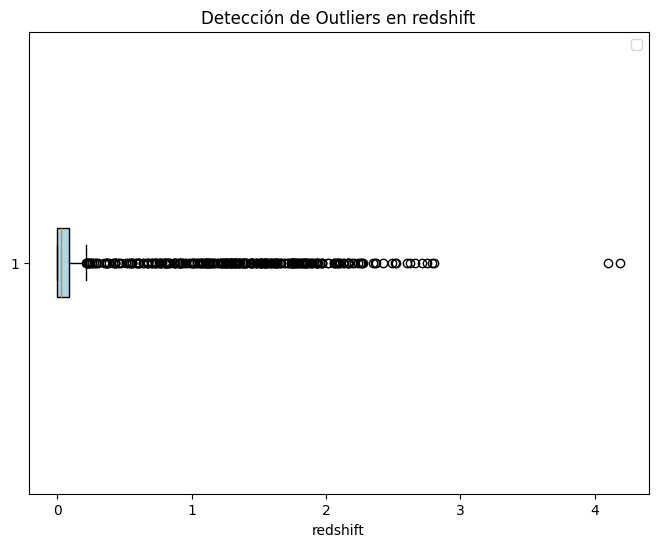

In [28]:
columna = 'redshift'

plt.figure(figsize=(8, 6))
plt.boxplot(dataframe_train_encoded[columna], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title(f"Detección de Outliers en {columna}")
plt.xlabel(columna)
plt.legend()
plt.show()

Aunque existe la posibilidad de mejorar las métricas eliminando o recortando datos atípicos (outliers), hemos decidido mantenerlos en el conjunto de datos debido a que representan un porcentaje considerable (más del 5%). Si bien su eliminación podría mejorar la precisión del modelo, preferimos preservar la integridad y la representatividad de la muestra para no perder información potencialmente valiosa.

## 7.4 Homocedasticidad

Se espera que los residuos se dispersen de manera uniforme alrededor de cero en todo el rango de valores predichos.

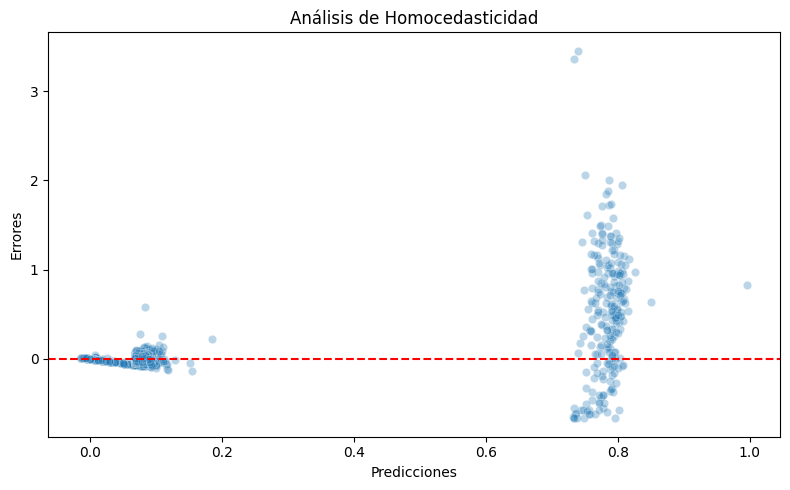

In [29]:
# 1. Predicciones y cálculo de residuos en TRAIN
y_pred_train = model_pipeline.predict(X_train)
errors_train = y_train - y_pred_train  # O y_pred_train - y_train, según tu convención

# 2. Gráfico de dispersión (homocedasticidad)
plt.figure(figsize=(8, 5))
plt.title("Análisis de Homocedasticidad")
sns.scatterplot(x=y_pred_train, y=errors_train, alpha=0.3)
plt.xlabel("Predicciones")
plt.ylabel("Errores")
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

A primera vista, los errores se mantienen relativamente dispersos alrededor de la línea roja sin mostrar un patrón de expansión claro a medida que aumentan las predicciones, lo cual refuerza la idea de que el modelo presenta una varianza de errores estable y, por ende, buenos indicios de homocedasticidad. Esto habla positivamente de la confiabilidad y la consistencia del modelo en el rango de valores predichos.

No obstante, se observa la presencia de algunos outliers que podrían alterar ligeramente el comportamiento de los errores en ciertas regiones, influyendo en la precisión del modelo y en la interpretación de los resultados. En cualquier caso, su efecto no parece lo suficientemente significativo como para comprometer de manera general la calidad de las predicciones.

# **8. Persistencia del Modelo**

Ya con el modelo listo, se procederá con la persistencia del modelo a un archivo binario que posteriormente pueda ser reutilizado.

In [30]:
joblib.dump(model_pipeline, 'regression_pipeline.joblib')

['regression_pipeline.joblib']

Archivo y resultado de predicciones sobre los datos de prueba en formato CSV

In [31]:
output_file = 'dataframe_train_final.csv'
dataframe_train_encoded.to_csv(output_file, index=False)

print(f"Archivo CSV generado exitosamente: {output_file}")

Archivo CSV generado exitosamente: dataframe_train_final.csv
